In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
products = {
    "Product Name": ["sciworm", "oxonium", "mRNA display app", "OpenPKai", "Cell Line Atlas", "siPHONN", "Cohort Browser", "sciworm", "TDeasy", "DRUGSeq"],
    "Area": ["In Vitro Target Validation", "In Vitro Target Validation", "Lead Identification", "Lead Optimization", "In Silico Target Identification", "Lead Identification", "In Silico Target Identification", "In Vitro Target Validation", "In Silico Target Identification", "Lead Optimization"],
    "Type": ["Data Registration", "Data Registration", "Data Registration", "Data Product", "Data Registration", "Data Registration", "Data Registration", "Data Registration", "Data Registration", "Data Registration"],
    "Fields": [17, 14, 29, 82, 12, 28, 73, None, 42, 57],
    "Value": [83, 122, None, 15, 84, 180, 159, 7, 36, 34],
    "Year": [2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024]
}
products_df = pd.DataFrame(products)
products_df

,Product Name,Area,Type,Fields,Value,Year
0,sciworm,In Vitro Target Validation,Data Registration,17.0,83.0,2023
1,oxonium,In Vitro Target Validation,Data Registration,14.0,122.0,2023
2,mRNA display app,Lead Identification,Data Registration,29.0,NaN,2023
3,OpenPKai,Lead Optimization,Data Product,82.0,15.0,2023
4,Cell Line Atlas,In Silico Target Identification,Data Registration,12.0,84.0,2023
5,siPHONN,Lead Identification,Data Registration,28.0,180.0,2024
6,Cohort Browser,In Silico Target Identification,Data Registration,73.0,159.0,2024
7,sciworm,In Vitro Target Validation,Data Registration,NaN,7.0,2024
8,TDeasy,In Silico Target Identification,Data Registration,42.0,36.0,2024
9,DRUGSeq,Lead Optimization,Data Registration,57.0,34.0,2024


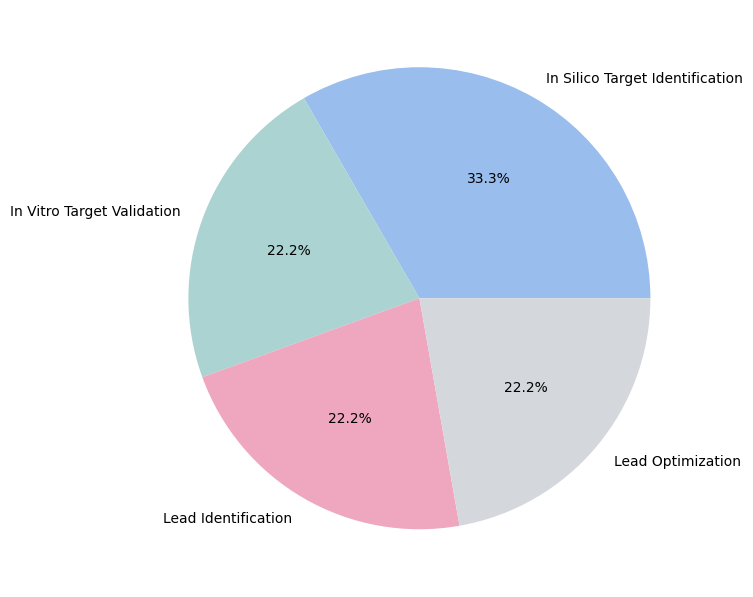

In [22]:
# Pie chart of area distribution

df = pd.DataFrame(products)
area = df.drop_duplicates(subset=['Product Name', 'Area'])[['Product Name', 'Area']]    
area = area.assign(Area=area['Area'].str.split('/')).explode('Area')
area['weightage'] = 1/area.groupby('Product Name')['Area'].transform('count')
colors = ['#99BDED','#AAD3D1','#EEA7BF','#D4D7DC', '#CCC5BD']
area.groupby('Area').sum().plot.pie(y='weightage', autopct='%1.1f%%', colors = colors)
plt.legend().remove()
plt.ylabel('')
plt.gcf().set_size_inches(7.5, 7.5)
plt.show()


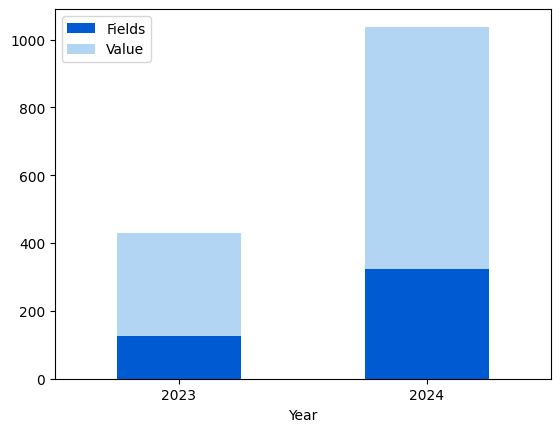

In [16]:
# plot number of fields and values by year in a cumulative way
df2 = df.dropna(subset=['Fields', 'Value'])
df2 = df2.groupby('Year').sum().cumsum()
df2.plot(kind='bar', stacked=True, color = ['#005AD2', '#B1D5F2'])
#make the plot look better
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.show()

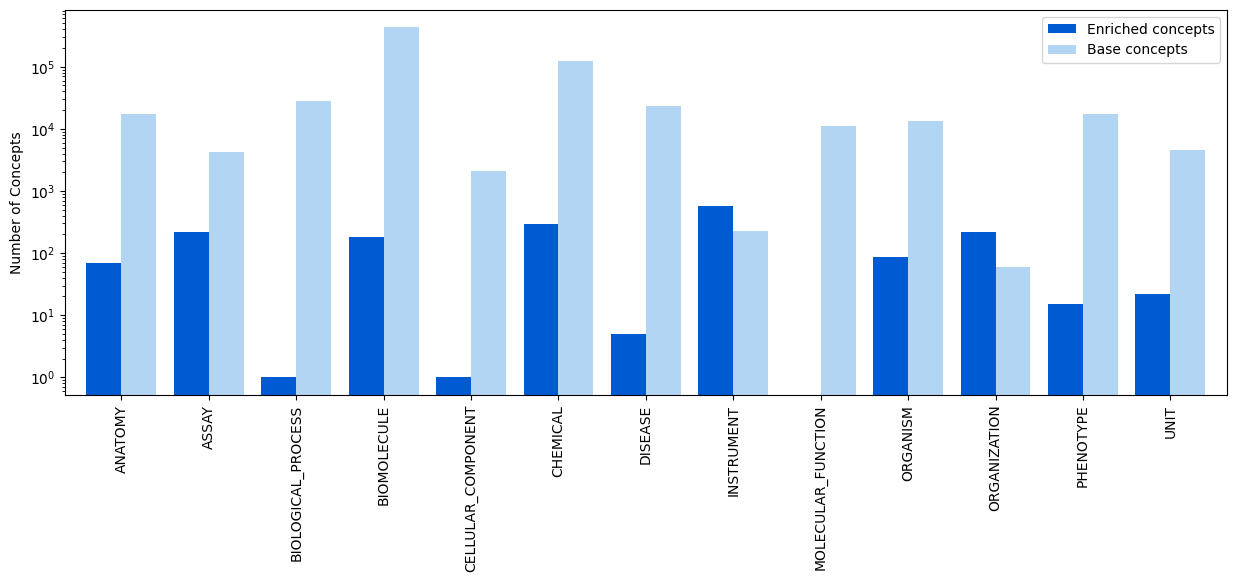

In [17]:
base_concepts = pd.read_csv('data/base.csv')
enriched_concepts = pd.read_csv('data/enrichment.csv')
base_concepts['modelID'] = base_concepts['modelID'].str.split('_base').str[0] 
concepts = pd.merge(base_concepts, enriched_concepts, on='modelID', how='outer')
concepts = concepts[['modelID', 'enriched', 'concepts']]
concepts = concepts.rename(columns={'concepts': 'Base concepts'})
concepts = concepts.rename(columns={'enriched': 'Enriched concepts'})
concepts = concepts.fillna(0)
concepts = concepts[concepts['modelID'] != 'NN_CONCEPT']

#plot a bar chart with enriched and concepts side by side
concepts = concepts.groupby('modelID').sum()
fig, ax = plt.subplots(figsize=(15, 5))
concepts.plot(kind='bar', color = ['#005AD2', '#B1D5F2'], width=0.8, ax=ax)
plt.xlabel('')
plt.ylabel('Number of Concepts')
plt.yscale('log')
plt.show()

